In [2]:
from tika import parser

In [18]:
from dataclasses import dataclass

In [3]:
raw = parser.from_file('edpetro.pdf')

2022-03-31 14:55:33,076 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /var/folders/04/h394vw3901q79p5pg9qx679c0000gn/T/tika-server.jar.
2022-03-31 14:55:50,544 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /var/folders/04/h394vw3901q79p5pg9qx679c0000gn/T/tika-server.jar.md5.
2022-03-31 14:55:52,539 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [8]:
raw = raw['content'].replace('\n', '')

In [87]:
@dataclass
class Person:
    cod: str
    name: str
    p1: float
    p2: float
    p3: float
    p4: float
    p5: float
    p6: float
    p7: float
    _score: str
        
    @property
    def score(self) -> float:
        return self._score.split(" ")[-1]
        
    def __lt__(self, other):
        return self.score > other.score

In [90]:
result = list(
    filter(
        lambda x: x is not None,
        map(
            lambda p: Person(
                *list(map(lambda x: x.strip(), p.strip().split(",")))
            ),
            raw[4 : raw.find("1.1.14.1 ÊNFASE 14:")].strip().split("/"),
        ),
    )
)

In [103]:
result.sort()

In [106]:
final = list(zip(list(range(1, len(result)+1)), result))

In [117]:
import pandas as pd

In [123]:
result_df = pd.DataFrame(list(map(lambda x: {'pos': x[0], 'name': x[1].name, 'score': x[1].score}, final)))

In [124]:
result_df.head()

,pos,name,score
0,1,Vinicius da Silva Duarte,96.00
1,2,Antonio Cesar Valadares de Oliveira,94.00
2,3,Gustavo Colheri Uchida,90.00
3,4,Jean Muniz de Souza,90.00
4,5,Breno Mascarenhas de Cerqueira Menezes,89.00


In [129]:
import matplotlib.pyplot as plt

<AxesSubplot:>

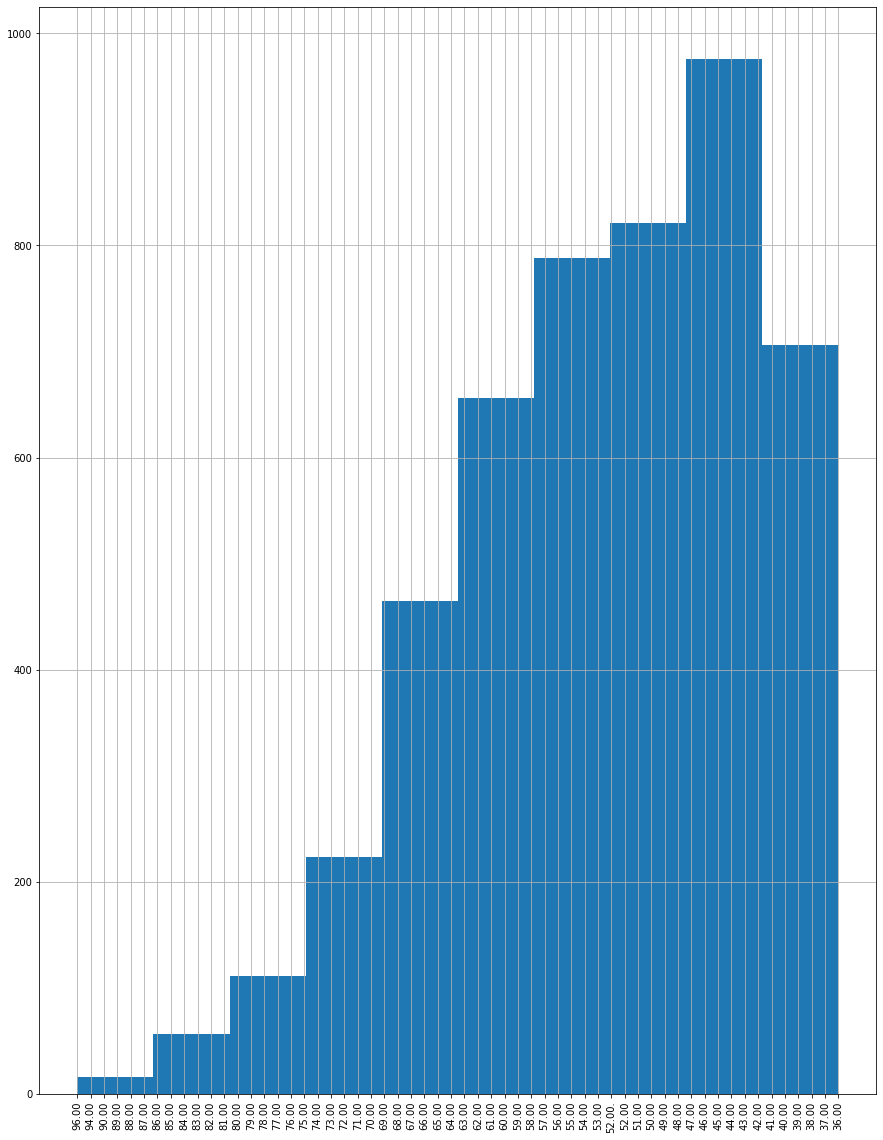

In [134]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
plt.xticks(rotation=90)
result_df['score'].hist(ax=ax)